<a href="https://colab.research.google.com/github/migariane/DeltaMethodInfluenceFunction/blob/main/R-CodeBoxes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Delta Method

Code for reproducing all the results in the paper _The Delta-method and influence function in epidemiology: a reproducible tutorial_

### Authors

Rodrigo Zepeda-Tello 1| Michael Schomaker 2,3| Aurelien Belot 4| Camille Maringe 4| Mathew Smith 4| Bernard Rachet 4| Mireille E.Schnitzer 5,6| Miguel Angel Luque Fernandez* 4,7  

Affiliations  

  1. Instituto Mexicano del Seguro Social, Mexico.
  2. Institute of Public Health, Medical Decision Making and Health Technology Assessment Department of Public Health, Health Services Research and Health Technology Assessment UMIT - University for Health Sciences, Medical Informatics and Technology, Austria.
  3. Centre for Infectious Disease Epidemiology and Research, University of Cape Town,South Africa.
  4. ICON-group. Non-communicable Disease Epidemiology. London School of Hygiene and Tropical Medicine. London, U.K.
  5. Faculty of Pharmacy and Department of Social and Preventive Medicine, University of Montreal, Montreal, Canada.
  6. Department of Epidemiology, Biostatistics and Occupational Health, McGill University, Montreal, Canada.
  7. Department of Statistics and Operations Research, University of Granada, Granada, Spain.  

Correspondence*    
Miguel Angel Luque-Fernandez  
Email: miguel-angel.luque@lshtm.ac.uk  


To use **R** run **rmagic** by executing this command:

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## BOX ONE

[1] 0.490561 0.526475


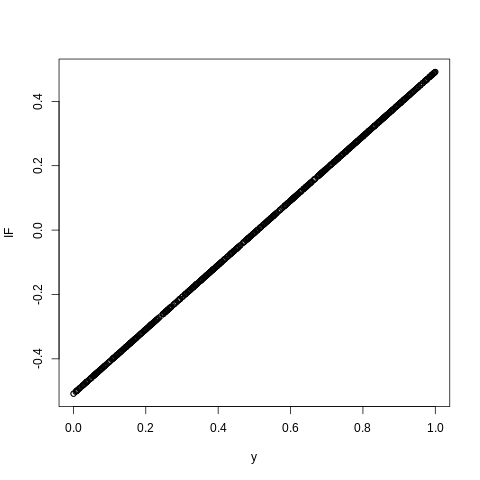

In [ ]:
%%R 
##install.packages('msm')
library(msm)
set.seed(7777)
n <- 1000
y <- runif(n, 0, 1)
theoretical_mu <- 0.5 
empirical_mu <- mean(y)

# Functional delta-method: influence curve for the sample mean (first derivative=1(constant))
IF <- 1 * (y - empirical_mu)
mean(IF) #zero by definition

# Plug-in estimation of the sample mean
Yhat <- y + IF # Plug-in estimator
mean(Yhat)

# Geometry of the IF
plot(y, IF)

# Standard Error: Influence Fuction
varYhat.IF <- var(IF) / n # hatvar(hatIF) =1/n sum(yi-bary)^2
seIF <- sqrt(varYhat.IF);seIF
# 0.009161893

# Asymptotic linear inference 95% Confidence Intervals
Yhat_95CI <- c(mean(Yhat) - qnorm(0.975) * sqrt(varYhat.IF), mean(Yhat) + qnorm(0.975) * sqrt(varYhat.IF)); 
mean(Yhat)
## [1] 0.508518
Yhat_95CI
## [1] 0.490561 0.526475





## BOX TWO

In [ ]:
%%R
# Data generation
# install.packages('mvtnorm')
library(mvtnorm)
set.seed(123)

data  <- data.frame(rmvnorm(1000, c(3,4), matrix(c(1,0.3,0.3,2), ncol = 2)))
colnames(data) <- c("X","Y")

# SE estimation for the ratio: Delta-Method based on the IF
ratio <- mean(data$X)/mean(data$Y);mean(ratio)


n <- 1000
a <-    (1 / (mean(data$Y))^2) * var(data$X) 
b <-   ((mean(data$X))^2 / (mean(data$Y))^4) * var(data$Y) 
c <-    2 * ((mean(data$X)) / (mean(data$Y))^3) * cov(data$X,data$Y)
var.IF <- 1/n *(a+b-c); var.IF

SE <- sqrt(var.IF); SE

CI = c(mean(ratio)-qnorm(0.975)*SE,mean(ratio)+qnorm(0.975)*SE); mean(ratio); CI

# Cheking results
# CI Delta method
theta1 <- mean(data$X)
sd1 <- sd(data$X)
theta2 <- mean(data$Y)
sd2 <- sd(data$Y)
CI.Delta = function(theta1, sd1,
                     theta2, sd2,# estimate and estimated sd of estimator
                     alpha # theoretical coverage (1-alpha)
 )
 {
## CI Delta method
## Hirschberg, J., and J. Lye. 2010.
## “A Geometric Comparison of the Delta and Fieller Confidence Intervals.”
## The American Statistician 64 (3): 234–41
## We assume here independence between theta1.hat and theta2.hat
    z = qnorm(p=1-alpha/2)
    R = theta1/theta2
    sd.R = sqrt(sd1^2 + R^2 * sd2^2)/theta2
    L = R - z*sd.R
    U = R + z*sd.R
    res = c(R,L,U)
    names(res) = c('R','L','U')
    return(res)
 }
# 95%CI Delta-method
CI.Delta(theta1, sd1, theta2, sd2, 0.95)

        R         L         U 
0.7541776 0.7315508 0.7768045 


## BOX THREE


In [ ]:
%%R
# install.packages("epitools")
library(epitools)
RRtable <- matrix(c(60,40,40,60),nrow = 2, ncol = 2)
RRtable
# The next line asks R to compute the RR and 95% confidence interval
riskratio.wald(RRtable)
# 1.5
p1 <- 0.6
p2 <- 0.4
N1 <- 100
N2 <- 100
ratio <- 0.6 / 0.4; ratio
# 1.5
var.IF <- (1 / (p1)^2 * (p1 * (1 - p1)/ N1)) + (1 / (p2)^2 * (p2 * (1 - p2)/ N2));var.IF
SE <- sqrt(var.IF); SE
# 0.147196
CI = c(log(ratio)-qnorm(.975)*SE,log(ratio)+qnorm(.975)*SE); ratio; exp(CI)
# 1.124081 2.001634

[1] 1.124081 2.001634


## BOX FOUR

     LCL      UCL 
49.26406 49.45863 


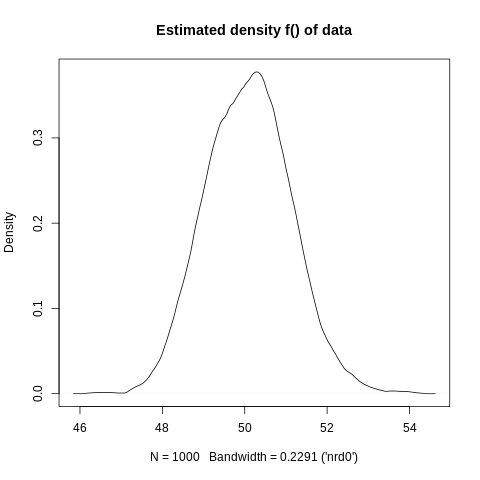

In [ ]:
# Data generation
%%R
set.seed(7777)
#install.packages('kdensity')
#install.packages('EnvStast')

library(kdensity)
library(EnvStats)
n           <- 1000
y           <- rnorm(n,50)
my_p        <- 0.25 #Change as you see fit

#Compute the first quartile 
empirical_quantile <- quantile(y, my_p); 
f_hat              <- kdensity(y, kernel = "epanechnikov", normalized = F)
plot(f_hat, main = "Estimated density f() of data")

# IF based 95%CI for Y 
var_IF  <- my_p*(1 - my_p)/(f_hat(empirical_quantile)^2)
SEy_IF  <- sqrt(var_IF/n)
CI      <- c(empirical_quantile - qnorm(0.975)*SEy_IF, empirical_quantile + qnorm(0.975)*SEy_IF); CI

## 25%      95%
## 49.28908 49.46078 

# Check results binomial and asymptotically based 95%CI 
eqnpar(x=y, p=my_p, ci=TRUE, ci.method="exact",approx.conf.level=0.95)$interval$limits

##     LCL      UCL 
## 49.26460 49.45987 

eqnpar(x=y, p=my_p, ci=TRUE, ci.method="normal.approx",approx.conf.level=0.95)$interval$limits
##     LCL      UCL 
## 49.26406 49.45863 

## BOX FIVE

In [ ]:
%%R
# Delta-method for the SE of the correlation between two vectors X and Y based on the IF.
# install.packages("MASS")

# Generate the data
samples = 1000
R = 0.83
library('MASS')
set.seed(1)
data = mvrnorm(n=samples, mu=c(0, 0), Sigma=matrix(c(1, R, R, 1), nrow=2), empirical=TRUE)
X = data[, 1]  # standard normal (mu=0, sd=1)
Y = data[, 2]  # standard normal (mu=0, sd=1)
# Assess that it works
cor(X, Y)  # r = 0.83

mu1 = mean(X*Y)
mu2 = mean(X)
mu3 = mean(Y)
mu4 = mean(X^2)
mu5 = mean(Y^2) 

IF1 = X*Y-mu1 
IF2 = X-mu2
IF3 = Y-mu3 
IF4 = X^2-mu4 
IF5 = Y^2-mu5

IF = 
    (sqrt(mu4-mu2^2)*sqrt(mu5-mu3^2))^(-1)*IF1+ 
    (-mu3*sqrt(mu4-mu2^2)*sqrt(mu5-mu3^2)+(mu1-mu2*mu3)*mu2*sqrt(mu5-mu3^2)/sqrt(mu4-mu2^2))/((mu4-mu2^2)*(mu5-mu3^2))*IF2+ 
    (-mu2*sqrt(mu4-mu2^2)*sqrt(mu5-mu3^2)+(mu1-mu2*mu3)* mu3*sqrt(mu4-mu2^2)/sqrt(mu5-mu3^2))/((mu4-mu2^2)*(mu5-mu3^2))*IF3+ 
    (-mu1+mu2*mu3)/(2*(mu4-mu2^2)^1.5*(mu5-mu3^2)^.5)*IF4+ 
    (-mu1+mu2*mu3)/(2*(mu4-mu2^2)^.5*(mu5-mu3^2)^1.5)*IF5

SE = sd(IF)/sqrt(1000); SE

rho_hat = (mu1-mu2*mu3)/(sqrt(mu4-mu2^2)*sqrt(mu5-mu3^2)); rho_hat
CI = c(rho_hat-qnorm(0.975)*SE,rho_hat+qnorm(0.975)*SE); CI
## CI [1] 0.8107681 0.8492319

## Checking results:
## Pearson correlation and "normal" confidence intervals.
## install.packages("confintr")
library(confintr)
ci_cor(X,Y)
#Sample estimate: 0.83 
#Confidence interval:
#    2.5%     97.5% 
#    0.8096678 0.8483423 

## Also bootstrap confidence intervals are supported and are the only option for rank correlations. 
# install.packages('boot')
library(boot)
ci_cor(X,Y, method = "pearson", type = "bootstrap", R = 1000, seed = 1)



	Two-sided 95% bootstrap confidence interval for the true Pearson
	correlation coefficient based on 1000 bootstrap replications and the
	bca method

Sample estimate: 0.83 
Confidence interval:
     2.5%     97.5% 
0.8081769 0.8475616 



## BOX SIX


In [ ]:
%%R
# Data generation
set.seed (1972)
N <- 1000
# Age (1: > 65; 0: <= 65)
age <- rbinom(N, 1 ,0.6)
# treatment (1: dual; 0=mono)
treat <- rbinom(N,1,plogis (0.35 - 0.15*age))
# Counterfactual outcome under A=1 and A=0 respectively
death.1 <- rbinom(N,1,plogis(2 - 1*1 + 0.65*age))
death.0 <- rbinom(N,1,plogis(2 - 1*0 + 0.65*age))
# Observed outcome: mortality at 1 year after treatment initiation (1: death)
death <- death.1*treat + death.0*(1 - treat)
# One year mortality risk differences
mean(death.1 - death.0)
## -0.13            

[1] -0.13


## BOX SEVEN

In [ ]:

%%R
# Delta method to derive the SE for the conditional RR
data  <- as.data.frame(cbind(death , treat , age))
m <- glm(death ~ age + treat, family = binomial, data = data)

pMono <- predict(m, newdata = data.frame(age = 1, treat = 0), type = "response")
pDual <- predict(m, newdata = data.frame(age = 0, treat = 1), type = "response")

rr <- pMono / pDual;rr
# Conditional Risk Ratio:  1.330238

# The partial derivative are computed in R as follows:
x1 <- 1
x2 <- 0
x3 <- 0
x4 <- 1
b0 <- coef(m)[1]
b1 <- coef(m)[2]
b2 <- coef(m)[3]
e1 <- exp(- b0 - 1*b1 - 0*b2)
e2 <- exp(- b0 - 0*b1 - 1*b2)
p1 <- 1 / (1 + e1)
p2 <- 1 / (1 + e2)
# check rr 
p1/p2
# 1.330238

dfdb0 <- -e2*p1 + (1 + e2)*p1*(1 - p1)
dfdb1 <- -x2*e2*p1 + (1 + e2)*x1*p1*(1 - p1)
dfdb2 <- -x4*e2*p1 + (1 + e2)*x3*p1*(1 - p1)
grad <- c(dfdb0, dfdb1, dfdb2)
vG <- t(grad) %*% vcov(m) %*% (grad)
se_rr <- c(sqrt(vG))
se_rr
# 0.06057779



[1] 0.06057779


In [ ]:

%%R
# Delta method to derive the SE for the conditional RR
data  <- data.frame(cbind(death , treat , age))
m <- glm(death ~ age + treat, family = binomial, data = data)
pMono <- predict(m, newdata = data.frame(age = 1, treat = 0), type = "response")
pDual <- predict(m, newdata = data.frame(age = 0, treat = 1), type = "response")
rr <- pMono / pDual;rr
# Conditional Risk Ratio:  1.330238

# The partial derivative are computed in R as follows:
x1 <- 1
x2 <- 0
x3 <- 0
x4 <- 1
b0 <- coef(m)[1]
b1 <- coef(m)[2]
b2 <- coef(m)[3]
e1 <- exp(- b0 - 1*b1 - 0*b2)
e2 <- exp(- b0 - 0*b1 - 1*b2)
p1 <- 1 / (1 + e1)
p2 <- 1 / (1 + e2)
# check rr 
p1/p2
# 1.330238

dfdb0 <- -e2*p1 + (1 + e2)*p1*(1 - p1)
dfdb1 <- -x2*e2*p1 + (1 + e2)*x1*p1*(1 - p1)
dfdb2 <- -x4*e2*p1 + (1 + e2)*x3*p1*(1 - p1)
grad <- c(dfdb0, dfdb1, dfdb2)
vG <- t(grad) %*% vcov(m) %*% (grad)
se_rr <- c(sqrt(vG))
se_rr
# 0.06057779



[1] 0.06057779


In [ ]:

%%R
# Delta method to derive the SE for the conditional RR
data  <- data.frame(cbind(death , treat , age))
m <- glm(death ~ age + treat, family = binomial, data = data)
pMono <- predict(m, newdata = data.frame(age = 1, treat = 0), type = "response")
pDual <- predict(m, newdata = data.frame(age = 0, treat = 1), type = "response")
rr <- pMono / pDual;rr
# Conditional Risk Ratio:  1.330238

# The partial derivative are computed in R as follows:
x1 <- 1
x2 <- 0
x3 <- 0
x4 <- 1
b0 <- coef(m)[1]
b1 <- coef(m)[2]
b2 <- coef(m)[3]
e1 <- exp(- b0 - 1*b1 - 0*b2)
e2 <- exp(- b0 - 0*b1 - 1*b2)
p1 <- 1 / (1 + e1)
p2 <- 1 / (1 + e2)
# check rr 
p1/p2
# 1.330238



(Intercept) 
   1.330238 


In [ ]:

%%R
# Delta method to derive the SE for the conditional RR
data  <- data.frame(cbind(death , treat , age))
m <- glm(death ~ age + treat, family = binomial, data = data)
pMono <- predict(m, newdata = data.frame(age = 1, treat = 0), type = "response")
pDual <- predict(m, newdata = data.frame(age = 0, treat = 1), type = "response")
rr <- pMono / pDual;rr
# Conditional Risk Ratio:  1.330238

# The partial derivative are computed in R as follows:
x1 <- 1
x2 <- 0
x3 <- 0
x4 <- 1
b0 <- coef(m)[1]
b1 <- coef(m)[2]
b2 <- coef(m)[3]
e1 <- exp(- b0 - 1*b1 - 0*b2)
e2 <- exp(- b0 - 0*b1 - 1*b2)
p1 <- 1 / (1 + e1)
p2 <- 1 / (1 + e2)
# check rr 
p1/p2
# 1.330238

dfdb0 <- -e2*p1 + (1 + e2)*p1*(1 - p1)
dfdb1 <- -x2*e2*p1 + (1 + e2)*x1*p1*(1 - p1)
dfdb2 <- -x4*e2*p1 + (1 + e2)*x3*p1*(1 - p1)
grad <- c(dfdb0, dfdb1, dfdb2)
vG <- t(grad) %*% vcov(m) %*% (grad)
se_rr <- c(sqrt(vG))
se_rr
# 0.06057779



[1] 0.06057779


In [ ]:

%%R
# Delta method to derive the SE for the conditional RR
data  <- data.frame(cbind(death , treat , age))
m <- glm(death ~ age + treat, family = binomial, data = data)
pMono <- predict(m, newdata = data.frame(age = 1, treat = 0), type = "response")
pDual <- predict(m, newdata = data.frame(age = 0, treat = 1), type = "response")
rr <- pMono / pDual;rr
# Conditional Risk Ratio:  1.330238

# The partial derivative are computed in R as follows:
x1 <- 1
x2 <- 0
x3 <- 0
x4 <- 1
b0 <- coef(m)[1]
b1 <- coef(m)[2]
b2 <- coef(m)[3]
e1 <- exp(- b0 - 1*b1 - 0*b2)
e2 <- exp(- b0 - 0*b1 - 1*b2)
p1 <- 1 / (1 + e1)
p2 <- 1 / (1 + e2)
# check rr 
rr <- p1/p2
# 1.330238

dfdb0 <- -e2*p1 + (1 + e2)*p1*(1 - p1)
dfdb1 <- -x2*e2*p1 + (1 + e2)*x1*p1*(1 - p1)
dfdb2 <- -x4*e2*p1 + (1 + e2)*x3*p1*(1 - p1)
grad <- c(dfdb0, dfdb1, dfdb2)
vG <- t(grad) %*% vcov(m) %*% (grad)
se_rr <- c(sqrt(vG))
se_rr
# 0.06057779

# Check with implemented delta-method in library msm 
library(msm)
se_rr_delta <- deltamethod( ~(1 + exp(-x1 -0*x2 -1*x3)) /
                                (1 + exp(-x1 -1*x2 -0*x3)), 
                            c(b0, b1, b2), 
                            vcov(m));se_rr_delta
## 0.06057779
# We obtain the same results for the SE of the RR computed before

# Finally, we compute the type Wald 95% CI
lb <- rr - qnorm(.975) * sqrt(vG)
ub <- rr + qnorm(.975) * sqrt(vG)

# Conditional Risk Ratio (95%CI)
c(lb, ub)
##  1.211508 1.448968

[1] 1.211508 1.448968
